# Naive Bayes Model
_______________________________

In [36]:
# Initial imports
import pandas as pd
from pathlib import Path
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.naive_bayes import GaussianNB
import hvplot.pandas
import seaborn as sns
import matplotlib.pyplot as plt

### Load and Pre-process Data

In [37]:
# Read CSV Data
data = pd.read_csv('../creditcard.csv')
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [38]:
# Drop "Time" Column
data = data.drop(columns= "Time")

In [39]:
# Total Columns and Rows
data.shape

(284807, 30)

In [40]:
# Fraudulent Data
data[data['Class']==1].shape

(492, 30)

In [41]:
# Normal Data
data[data['Class']==0].shape

(284315, 30)

In [42]:
# Define features set
X = data.drop(columns = "Class")
X.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99


In [43]:
# Define target vector
y = data["Class"]
y[:5]

0    0
1    0
2    0
3    0
4    0
Name: Class, dtype: int64

In [44]:
# Splitting into Train and Test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [45]:
# Create the Standard Scaler instance
scaler = StandardScaler()

In [46]:
# Fit the Standard Scaler with the training data
X_scaler = scaler.fit(X_train)

In [47]:
# Scale the training data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler. transform(X_test)

### Fitting the Model

In [48]:
model = GaussianNB()

In [49]:
model = model.fit(X_train_scaled, y_train)

### Make Predictions

In [50]:
predictions = model.predict(X_test_scaled)

### Evaluate Model

In [51]:
# Calculating the confusion matrix
cm = confusion_matrix(y_test, predictions)
cm_df = pd.DataFrame(
    cm, index=["Actual 0", "Actual 1"], columns=["Predicted 0", "Predicted 1"]
)

# Calculating the accuracy score
acc_score = accuracy_score(y_test, predictions)


In [52]:
# Displaying results
print("Confusion Matrix")
display(cm_df)
print(f"Accuracy Score : {acc_score}")
print("Classification Report")
print(classification_report(y_test, predictions))

Confusion Matrix


,Predicted 0,Predicted 1
Actual 0,69595,1496
Actual 1,26,85


Accuracy Score : 0.978624195949552
Classification Report
              precision    recall  f1-score   support

           0       1.00      0.98      0.99     71091
           1       0.05      0.77      0.10       111

    accuracy                           0.98     71202
   macro avg       0.53      0.87      0.54     71202
weighted avg       1.00      0.98      0.99     71202



## Visualize Model

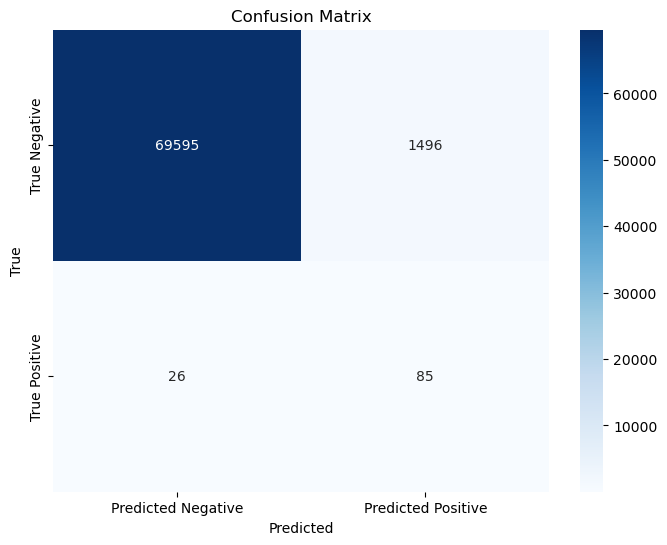

In [53]:
# Create a function to plot the confusion matrix
def plot_confusion_matrix(confusion_matrix):
    plt.figure(figsize=(8, 6))
    sns.heatmap(confusion_matrix, annot=True, fmt="d", cmap="Blues",
                xticklabels=["Predicted Negative", "Predicted Positive"],
                yticklabels=["True Negative", "True Positive"])
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title('Confusion Matrix')
    plt.show()

# Plot the confusion matrix
plot_confusion_matrix(cm)


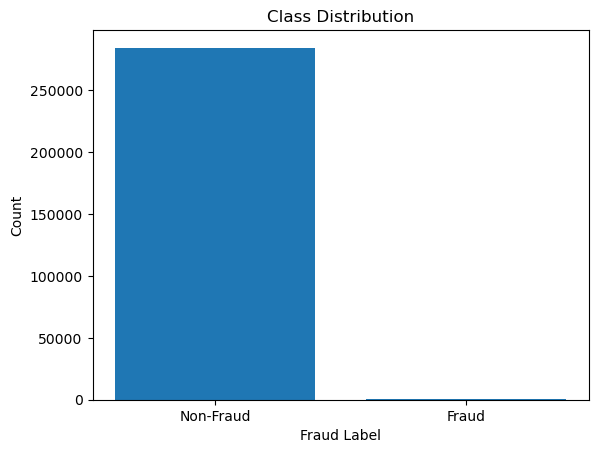

In [70]:
# Plot Fraud Label Amounts to check for Class Imbalance

fraud_counts = data['Class'].value_counts()

plt.bar(fraud_counts.index, fraud_counts.values)

plt.xlabel('Fraud Label')

plt.ylabel('Count')

plt.xticks([0, 1], ['Non-Fraud', 'Fraud'])

plt.title('Class Distribution')

plt.show()

### Dataset is imbalanced. Lack of fraudelent data gives a low precision score for detecting fraudelent charges.

## Oversampling Fraudulent Data

In [54]:
from imblearn.over_sampling import SMOTE

In [55]:
# Create Smote instance
sm=SMOTE()

In [56]:
# Resample x and y data
x_res,y_res=sm.fit_resample(X,y)

In [57]:
# Number of class values
y_res.value_counts()

0    284315
1    284315
Name: Class, dtype: int64

In [58]:
# Splitting Resampled Data
xtrain,xtest,ytrain,ytest=train_test_split(x_res,y_res,random_state=1)

In [59]:
# Create model variable
GNB = GaussianNB()

In [60]:
# Fit the training data to the scaler
xscaler = scaler.fit(xtrain)

In [61]:
# Transform training and testing data using the scaler
xtrain_scaled = xscaler.transform(xtrain)
xtest_scaled = xscaler. transform(xtest)

In [62]:
# Fit the training data to the model
GNB = GNB.fit(xtrain_scaled, ytrain)

In [63]:
# Run model predictions
predictionsGNB = GNB.predict(xtest_scaled)

In [64]:
# Calculating the confusion matrix
CM = confusion_matrix(ytest, predictionsGNB)
CM_DF = pd.DataFrame(
    CM, index=["Actual 0", "Actual 1"], columns=["Predicted 0", "Predicted 1"]
)

# Calculating the accuracy score
score = accuracy_score(ytest, predictionsGNB)


In [65]:
print("Confusion Matrix")
display(CM_DF)
print(f"Accuracy Score : {score}")
print("Classification Report")
print(classification_report(ytest, predictionsGNB))

Confusion Matrix


,Predicted 0,Predicted 1
Actual 0,69278,1865
Actual 1,9827,61188


Accuracy Score : 0.9177534855583225
Classification Report
              precision    recall  f1-score   support

           0       0.88      0.97      0.92     71143
           1       0.97      0.86      0.91     71015

    accuracy                           0.92    142158
   macro avg       0.92      0.92      0.92    142158
weighted avg       0.92      0.92      0.92    142158



## Visualize oversampled model

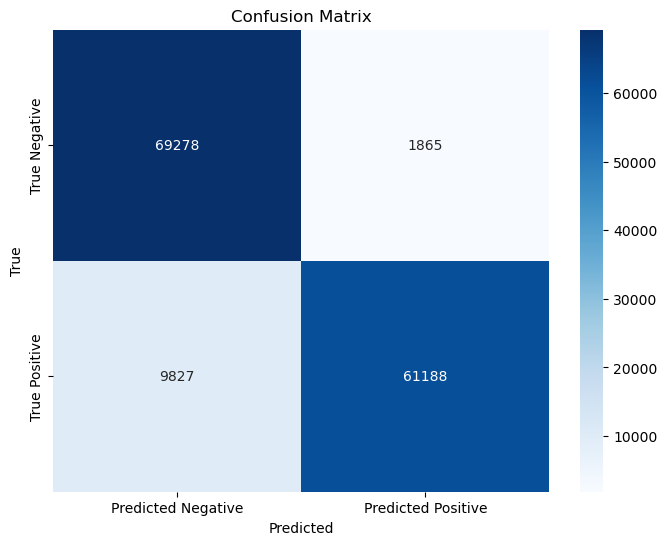

In [66]:
def plot_confusion_matrix(confusion_matrix):
    plt.figure(figsize=(8, 6))
    sns.heatmap(confusion_matrix, annot=True, fmt="d", cmap="Blues",
                xticklabels=["Predicted Negative", "Predicted Positive"],
                yticklabels=["True Negative", "True Positive"])
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title('Confusion Matrix')
    plt.show()

# Plot the confusion matrix
plot_confusion_matrix(CM)


## Visualize Amount Distribution

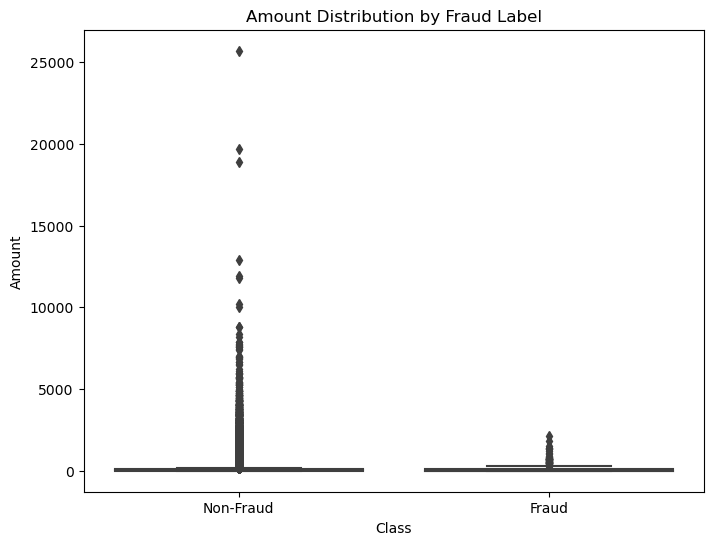

In [69]:
# Plot Amount Distribution per Class

plt.figure(figsize=(8, 6))

sns.boxplot(x='Class', y='Amount', data=data)

plt.title('Amount Distribution by Fraud Label')

plt.xticks([0, 1], ['Non-Fraud', 'Fraud'])

plt.show()
